# ML-1 Assignment

## Problem 1:
### Task 1
[Kaggle](https://www.kaggle.com/code/priyanshupansari/linear-regression)

### Task 2
[Kaggle](https://www.kaggle.com/code/priyanshupansari/linear-regression/notebook)

### Task 3
[Kaggle](https://www.kaggle.com/code/shrutimechlearn/step-by-step-assumptions-linear-regression/notebook)

## Problem 2:
### Task 1

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
%matplotlib inline

train_df=pd.read_csv('Data/pendigits.tes',header=None)
test_df=pd.read_csv('Data/pendigits.tra',header=None)

In [4]:
X_train=train_df.iloc[:,:-1]
y_train=train_df.iloc[:,-1]
X_test=test_df.iloc[:,:-1]
y_test=test_df.iloc[:,-1]

In [5]:
def draw(df,n):
    X=[df.iloc[n,x] for x in range(0,15,2)]
    Y=[df.iloc[n,x] for x in range(1,16,2)]
    plt.plot(X,Y)
    plt.show()

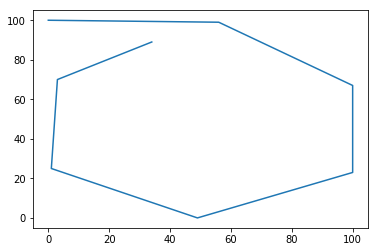

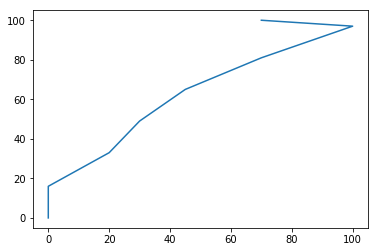

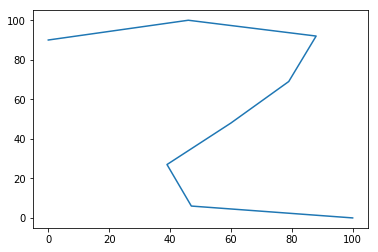

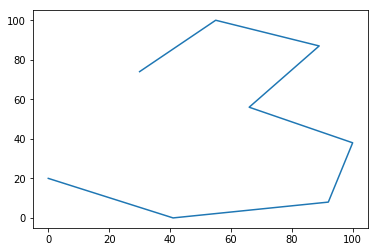

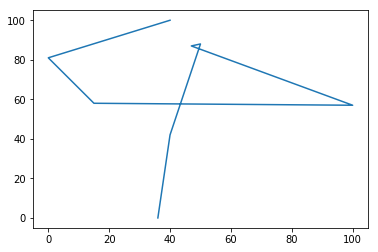

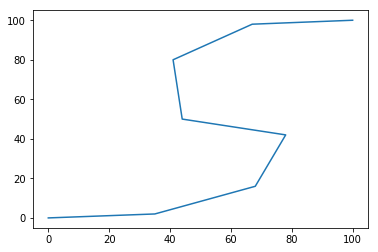

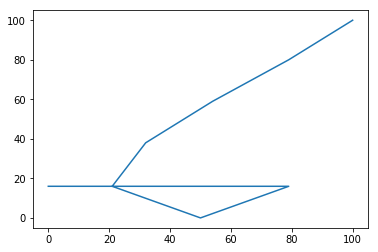

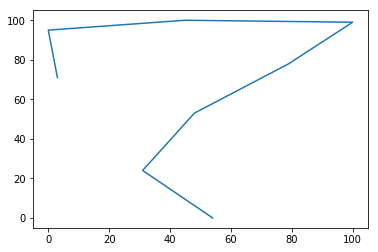

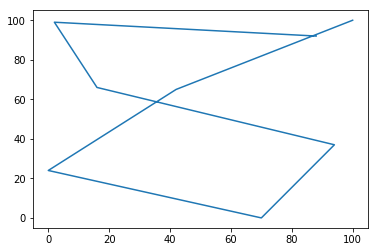

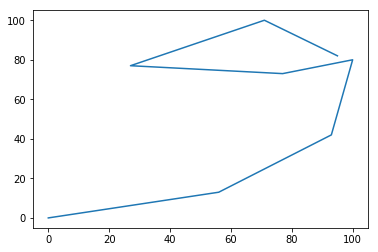

In [6]:
for i in range(10):
    x=(y_train==i).idxmax()
    draw(X_train,x)

## Task 2

In [7]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(random_state=0,max_iter=1000000).fit(X_train, y_train)

/home/priyanshu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [8]:
#Training score
model.score(X_train,y_train)

0.9768439108061749

In [9]:
#Test score
model.score(X_test,y_test)

0.911529223378703

In [10]:
#accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,model.predict(X_test))

0.911529223378703

## Task 3

In [13]:
import scipy.stats
class KNN:
    def __init__(self, k):
        # initialize data parameters
        self.k=k
        
    def load(self, dataset):
        # store dataset
        [self.X,self.y]=dataset
        
    def distance(self, p1, p2):
        # calculate L2 distance
        return (p1-p2)**2
    
    def score(self,X_test,y_test):
        return accuracy_score(y_test,self.predict(X_test))

    def predict(self, test):
        # predict the class of the test_point
        y_pred=[]
        for test_point in test.to_numpy():
            distances = np.linalg.norm(self.X - test_point, axis=1)
            nearest_neighbors_id = distances.argsort()[:self.k]
            nearest_neighbors_y=self.y[nearest_neighbors_id]
            #print(scipy.stats.mode(nearest_neighbors_y).mode[0])
            y_pred.append(scipy.stats.mode(nearest_neighbors_y).mode[0])
        return y_pred

In [14]:
model=KNN(1)
model.load([X_train, y_train])
model.score(X_test,y_test)

0.9494262076327729

## Task 4

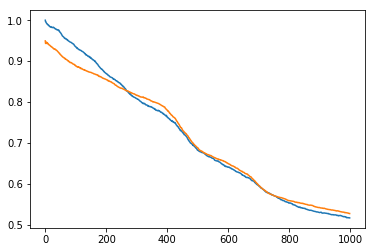

In [258]:
score_train=[]
score_test=[]
for i in range(1,1000):
    model=KNN(i)
    model.load([X_train, y_train])
    score_train.append(model.score(X_train,y_train))
    score_test.append(model.score(X_test,y_test))
plt.plot(score_train)
plt.plot(score_test)

## Task 5
### To decide the hyperparameters using the test accuracy is not the best way. Why?


Deciding the hyperparameters using test accuracy is not the best way as it overfits the model to the test data. Such a model may not give same accuracy on newer dataset and may perform worse.

# Brownie problem

In [81]:
from selectorlib import Extractor
import requests 
import json 
from time import sleep


# Create an Extractor by reading from the YAML file
e = Extractor.from_yaml_file('search_results.yml')

def scrapeS(url):  

#     headers = {
#         'dnt': '1',
#         'upgrade-insecure-requests': '1',
#         'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.61 Safari/537.36',
#         'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
#         'sec-fetch-site': 'same-origin',
#         'sec-fetch-mode': 'navigate',
#         'sec-fetch-user': '?1',
#         'sec-fetch-dest': 'document',
#         'referer': 'https://www.amazon.com/',
#         'accept-language': 'en-GB,en-US;q=0.9,en;q=0.8',
#     }
    headers=({'User-Agent':
           'Mozilla/5.0 (X11; Linux x86_64)AppleWebKit/537.36 (KHTML, like Gecko)Chrome/44.0.2403.157 Safari/537.36','Accept-Language': 'en-US, en;q=0.5'})

    # Download the page using requests
    print("Downloading %s"%url)
    r = requests.get(url, headers=headers)
    # Simple check to check if page was blocked (Usually 503)
    if r.status_code > 500:
        if "To discuss automated access to Amazon data please contact" in r.text:
            print("Page %s was blocked by Amazon. Please try using better proxies\n"%url)
        else:
            print("Page %s must have been blocked by Amazon as the status code was %d"%(url,r.status_code))
        return None
    # Pass the HTML of the page and create 
    return e.extract(r.text)

# urls = []
# url='https://www.amazon.in/s?k=smartphones&rh=p_36%3A900000-1000000&crid=2HWQM77E4E53F&qid=1654178719&rnid=1318502031&sprefix=smartphones+%2Caps%2C210'
# data = scrapeS(url) 

# if data:
#     for product in data['products']:
#         print("Saving Product: %s"%product['title'])
#         urls.append(product['url'])
        

In [82]:
from selectorlib import Extractor
import requests 
import json 
from time import sleep


# Create an Extractor by reading from the YAML file
e = Extractor.from_yaml_file('selectors.yml')

def scrape(url):  

#     headers = {
#         'dnt': '1',
#         'upgrade-insecure-requests': '1',
#         'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.61 Safari/537.36',
#         'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
#         'sec-fetch-site': 'same-origin',
#         'sec-fetch-mode': 'navigate',
#         'sec-fetch-user': '?1',
#         'sec-fetch-dest': 'document',
#         'referer': 'https://www.amazon.com/',
#         'accept-language': 'en-GB,en-US;q=0.9,en;q=0.8',
#     }
    headers=({'User-Agent':
           'Mozilla/5.0 (X11; Linux x86_64)AppleWebKit/537.36 (KHTML, like Gecko)/44.0.2403.157 Safari/537.36','Accept-Language': 'en-US, en;q=0.5'})

    # Download the page using requests
    print("Downloading %s"%url)
    r = requests.get(url, headers=headers)
    # Simple check to check if page was blocked (Usually 503)
    if r.status_code > 500:
        if "To discuss automated access to Amazon data please contact" in r.text:
            print("Page %s was blocked by Amazon. Please try using better proxies\n"%url)
        else:
            print("Page %s must have been blocked by Amazon as the status code was %d"%(url,r.status_code))
        return None
    # Pass the HTML of the page and create 
    return e.extract(r.text)

# # product_data = []
# output=pd.DataFrame()
# for url in urls:
#     data = scrape(' https://www.amazon.in'+url) 
#     if data:
#         output=output.append(data,ignore_index=True)
    

In [83]:
output=pd.DataFrame()
i=1
print('start')
while True:
    print('in')
    try:
        e = Extractor.from_yaml_file('search_results.yml')
        urls = []
        url='https://www.amazon.in/s?k=smartphones&rh=p_36%3A900000-1000000&page='+str(i)
        i+=1
        data = scrapeS(url) 
        print('in1')
        if data:
            print('in2')
            for product in data['products']:
                print('in3')
                print("Saving Product: %s"%product['title'])
                urls.append(product['url'])
        e = Extractor.from_yaml_file('selectors.yml')
        for url in urls:
            data = scrape(' https://www.amazon.in'+url) 
            if data:
                output=output.append(data,ignore_index=True)
    except:
        break

start
in
in1
in2
in3
Saving Product: Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Storage)
in3
Saving Product: Redmi 9 Activ (Coral Green, 4GB RAM, 64GB Storage)
in3
Saving Product: Redmi 9 Activ (Metallic Purple, 4GB RAM, 64GB Storage)
in3
Saving Product: Tecno Spark 8T (Atlantic Blue,7GB Expandable RAM, 64GB Storage)| 50MP AI Camera | 6.6" FHD+Display | 5000mAh
in3
Saving Product: Redmi 10A (Slate Grey, 4GB RAM, 64GB Storage)
in3
Saving Product: Redmi 10A (Charcoal Black, 4GB RAM, 64GB Storage)
in3
Saving Product: Oppo A16k (Black, 3GB RAM, 32GB Storage) with No Cost EMI/Additional Exchange Offers
in3
Saving Product: Maplin MAP-.2 Pro (6 GB / 128 GB) with 6.26 Inch Touchscreen and 5000 mAh Smartphone (Royal Gold)
in3
Saving Product: Maplin MAP.2 Pro (6 GB / 128 GB) with 6.26 Inch Touchscreen and 5000 mAh Smartphone (Royal Gold)
in3
Saving Product: Tecno Spark 8T (Turquoise Cyan,7GB Expandable RAM, 64GB Storage)| 50MP AI Camera | 6.6" FHD+Display | 5000mAh
in3
Saving Product: Tecno Spar

in
in1
in2
in3
Saving Product: OPPO A16e (Midnight Black, 3GB RAM, 32GB Storage) with No Cost EMI/Additional Exchange Offers
in3
Saving Product: Oppo A16k (Blue, 3GB RAM, 32GB Storage) with No Cost EMI/Additional Exchange Offers
in3
Saving Product: Maplin MAP-2 Pro (6 GB / 128 GB) with 6.26 Inch Touchscreen and 5000 mAh Smartphone (Sun Gold)
in3
Saving Product: Maplin MAP3 Pro (6GB / 64GB) with 6.26 Inch Touchscreen and 5000 mAh Smartphone (Phantom Black)
in3
Saving Product: realme C21Y (Cross Black, 3GB RAM, 32GB Storage), Medium
in3
Saving Product: (Renewed) Asus Zenfone Max Pro M1 (Black, 64 GB) (4 GB RAM) | 5000 mAh Battery (Black)
in3
Saving Product: Redmi Note 4 (Black, 64GB)
in3
Saving Product: Redmi 8A Dual (Sea Blue, 2GB RAM, 32GB Storage) – Dual Cameras & 5,000 mAH Battery
in3
Saving Product: (Renewed) OPPO A16k (Blue, 4GB RAM, 64GB Storage) with No Cost EMI/Additional Exchange Offers
in3
Saving Product: (Renewed) Realme Narzo 20 (Victory Blue, 4 GB RAM, 64 GB Storage)
in3
Sa

in
in1
in2
in3
Saving Product: Redmi Y2 (Dark Grey, 3GB RAM, 32GB Storage)
in3
Saving Product: T angxi Unlocked Mate40 Pro Dual SIM Unlocked Smartphones with 5.45in HD Full Screen, 1GB RAM, 8GB ROM, 2MP, 5MP, Android 6.0, Face/Fingerprint Unlock, 2200mAh Battery (Golden)
in3
Saving Product: Oppo A16k (Blue, 3GB RAM, 32GB Storage) with No Cost EMI/Additional Exchange Offers
in3
Saving Product: Samsung Galaxy Ace GT-S5830 (Pure White)
in3
Saving Product: Mi REDMI NOTE 4(BLACK) 3/32GB
in3
Saving Product: realme C31 (Light Silver, 3GB RAM, 32GB Storage)
in3
Saving Product: (Renewed) POCO C3 (64 GB Storage, 4 GB RAM)
in3
Saving Product: Redmi Poco C3 (Arctic Blue, 4 RAM /64 Storage)
in3
Saving Product: (Renewed) Samsung Galaxy A03s (Black, 3GB RAM, 32GB Storage) with No Cost EMI/Additional Exchange Offers
in3
Saving Product: Vivo Y91i (Fusion Black, 2GB RAM, 16GB Storage)
in3
Saving Product: (Renewed) Asus Zenfone Max M2 (Blue, 3GB RAM, 32GB Storage)
in3
Saving Product: Tecno Spark 8 (Atlan

in
in1
in2
in3
Saving Product: GENERIC REALME Model : NARZO 30 4/64 Android Mobile Phone Colour : Racing Blue
in3
Saving Product: Tecno Camon I 3Gb (Champagne Gold, 32Gb)
in3
Saving Product: Comio C1 (Space Black, 32GB)
in3
Saving Product: Redmi 9i (Nature Green, 4GB RAM, 64GB Storage)
in3
Saving Product: Redmi 9i (Midnight Black, 4GB RAM, 64GB Storage)
in3
Saving Product: Nokia 3 (White-Silver)
in3
Saving Product: (Renewed) Redmi 9 Prime (Sunrise Flare, 4GB RAM, 64GB Storage)- Full HD+ Display & AI Quad Camera
in3
Saving Product: ZOPO Color E ZP350 HD 4G(Yellow)
in3
Saving Product: (Renewed) Xiaomi Redmi Note 7 Pro (Space Black, 64 GB) (4 GB RAM)
in
in1
in2


In [84]:
temp=output.copy(deep=True)
temp

,Title,Ram,Size,Camera,Battery,Weight,Rank,Reviews,People_Rated,Price,Price2
0,"Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Sto...",‎4 GB,‎16.5 x 0.9 x 7.7 cm; 194 Grams,‎Dual Rear camera (13MP+2MP)|5MP Front camera,‎5000,‎194 g,#35 in Smartphones,4.2 out of 5 stars,"160,538 ratings","₹10,999.00",None
1,"Redmi 9 Activ (Coral Green, 4GB RAM, 64GB Stor...",‎4 GB,‎16.5 x 0.9 x 7.7 cm; 194 Grams,‎Bar,‎580 Hours,None,#23 in Smartphones,4.2 out of 5 stars,"160,538 ratings","₹10,999.00",None
2,"Redmi 9 Activ (Metallic Purple, 4GB RAM, 64GB ...",‎4 GB,‎16.5 x 0.9 x 7.7 cm; 194 Grams,‎Dual Rear camera (13MP+2MP)|5MP Front camera,‎5000,‎194 g,#30 in Smartphones,4.2 out of 5 stars,"160,538 ratings","₹10,999.00",None
3,"Tecno Spark 8T (Atlantic Blue,7GB Expandable R...",‎4 GB,‎16.5 x 7.6 x 0.9 cm; 192 Grams,‎Touchscreen,‎Touch,"‎Smartphone, Power Adaptor, USB Cable, TPU Cov...",#94 in Smartphones,4.1 out of 5 stars,"3,797 ratings","₹12,999.00",None
4,"Redmi 10A (Slate Grey, 4GB RAM, 64GB Storage)",‎64 GB,‎16.5 x 7.7 x 0.9 cm; 194 Grams,‎Touchscreen,‎Bar,‎China,#102 in Smartphones,3.8 out of 5 stars,601 ratings,"₹11,999.00",None
...,...,...,...,...,...,...,...,...,...,...,...
100,"Redmi 9i (Midnight Black, 4GB RAM, 64GB Storage)",‎4 GB,‎16.49 x 7.71 x 0.9 cm; 500 Grams,‎Wireless,‎3.5 mm,‎Redmi,"#1,873 in Smartphones",4.1 out of 5 stars,"1,164 ratings",None,None
101,Nokia 3 (White-Silver),‎2 GB,‎14.4 x 7.1 x 12.1 cm; 141 Grams,‎1280 x 720,‎White-Silver,‎141 g,"#3,981 in Smartphones",3.6 out of 5 stars,"1,519 ratings",None,None
102,"(Renewed) Redmi 9 Prime (Sunrise Flare, 4GB RA...",‎4 GB,‎16.3 x 0.9 x 7.8 cm; 450 Grams,‎Sunrise Flare,‎Xiaomi,None,"#4,376 in Smartphones",3.2 out of 5 stars,10 ratings,"₹11,399.00",None
103,ZOPO Color E ZP350 HD 4G(Yellow),‎Zopo,‎ZP350_Yellow,‎1 GHz,"‎Touchscreen, E-Mail, Radio, Internet, Music P...",‎No,None,4.0 out of 5 stars,2 ratings,None,None


In [456]:
data=pd.DataFrame()
data=data.append(output.loc[output.index[output["Price"].isnull()!=True]])
data=data.append(output.loc[output.index[output["Price2"].isnull()!=True]])
for i in range(data.shape[0]):
    if pd.isna(data.iloc[i,-2]):
        data.iloc[i,-2]=data.iloc[i,-1]
data=data.drop(["Title","Price2"],axis=1)
data["Price"]=data["Price"].str.replace('₹','').str.replace(',','').astype(float)
data["Ram"]=data["Ram"].str.strip('GB').str.strip('\u200e')
data=data.drop(data.index[data["Ram"] =='RISING STARS MOBILE INDIA PVT. LYD.'].tolist())
data=data.drop(data.index[data["Ram"] =='12 x 0.9 x 0.25 cm; 500 Grams'].tolist())
data["Ram"]=data["Ram"].astype(float)
data["Size"]=data["Size"].str.strip('\u200e')
data=data.drop(data.index[data["Size"] =='Cellular'].tolist())
data["Size"]=data["Size"].str.split('x')
data["SizeX"]=0.0
data["SizeY"]=0.0
data["SizeZ"]=0.0
for i in range(data.shape[0]):
    data.iloc[i,-3]=float(data.iloc[i,1][0])
    data.iloc[i,-2]=float(data.iloc[i,1][1])
    data.iloc[i,-1]=float(data.iloc[i,1][2].split('cm')[0])
    data.iloc[i,4]=float(data.iloc[i,1][2].split(';')[1].replace("Grams",''))
data=data.drop(["Size","Camera","Battery"],axis=1)

for i in range(data.shape[0]):
    if data.iloc[i,2] !=None:
        data.iloc[i,2]=int(data.iloc[i,2].split(' ')[0].replace("#",'').replace(",",''))
        
for i in range(data.shape[0]):
    if data.iloc[i,3] !=None:
        data.iloc[i,3]=float(data.iloc[i,3].split(' ')[0])
        
for i in range(data.shape[0]):
    if data.iloc[i,3] !=None:
        data.iloc[i,4]=float(data.iloc[i,4].replace(",",'').split(' ')[0])

#data["Rating"]=data["Reviews"]*data["People_Rated"]
#data=data.drop(["Reviews","People_Rated"],axis=1)
data

,Ram,Weight,Rank,Reviews,People_Rated,Price,SizeX,SizeY,SizeZ
0,4.0,194.0,35,4.2,160538.0,10999.0,16.5,0.9,7.7
1,4.0,194.0,23,4.2,160538.0,10999.0,16.5,0.9,7.7
2,4.0,194.0,30,4.2,160538.0,10999.0,16.5,0.9,7.7
3,4.0,192.0,94,4.1,3797.0,12999.0,16.5,7.6,0.9
4,64.0,194.0,102,3.8,601.0,11999.0,16.5,7.7,0.9
...,...,...,...,...,...,...,...,...,...
66,3.0,175.0,473,3.9,108.0,13990.0,16.4,7.5,0.8
77,1.0,137.0,8974,3.7,28.0,12000.0,13.7,0.8,6.9
79,1.0,145.0,6133,4.0,64.0,10000.0,13.1,0.9,6.6
85,64.0,202.0,2418,4.0,260.0,13499.0,16.5,7.6,0.9


In [457]:
data["Rank"]=data["Rank"].fillna(data["Rank"].mean())
#data["Rating"]=data["Rating"].fillna(data["Rating"].mean())
data["Reviews"]=data["Reviews"].fillna(data["Reviews"].mean())
data["People_Rated"]=data["People_Rated"].fillna(data["People_Rated"].mean())
data.isnull().sum()

Ram             0
Weight          0
Rank            0
Reviews         0
People_Rated    0
Price           0
SizeX           0
SizeY           0
SizeZ           0
dtype: int64

In [468]:
X_train, X_test, y_train, y_test = train_test_split(data.loc[:,data.columns!="Price"], data["Price"], test_size=0.1, random_state=42)

In [469]:
from sklearn.preprocessing import PolynomialFeatures
X_train=PolynomialFeatures(2).fit_transform(X_train)
X_test=PolynomialFeatures(2).fit_transform(X_test)

In [470]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train,y_train)

In [471]:
#Training score
model.score(X_train,y_train)

0.9403952460627543

In [472]:
#Test score
model.score(X_test,y_test)

0.7079260603333579